___
# Projeto 3 - CD
___

## Regressão linear que agrupa diferentes tipos de músicas de acordo com sua dançabilidade.

O objetivo desse projeto é fazer diferentes agrupamentos de músicas do Spotify, utilizando a regressão linear, levando em consideração o quão dançável é a música. Queremos analisar o tamanho obtido e as diferenças das quantidades de músicas em determinados grupos.

Exemplo de aplicação da técnica: https://www.kaggle.com/noemir/dimension-reduction-of-music-pref-in-progress/comments 

**Nomes das integrantes:**
Rebeca Moreno,
Giulia Passarelli e
Carla Kim

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import expon
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

In [2]:
#lendo a planilha de dados
sptdata = pd.read_csv("data.csv")

#ajustando a quantidade de termos que precisamos usar
spotdata = sptdata[0:100]
spotdatatreina = sptdata[100:200]

Dicionário dos dados:
https://developer.spotify.com/web-api/get-audio-features/

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing

Frequências relativas por notas musicais:
C         10.0
C♯, D♭    16.0
D         13.0
D♯, E♭     2.0
E          3.0
F          8.0
F♯, G♭     5.0
G          9.0
G♯, A♭     5.0
A         10.0
A♯, B♭    10.0
B          9.0
Name: key, dtype: float64 



//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


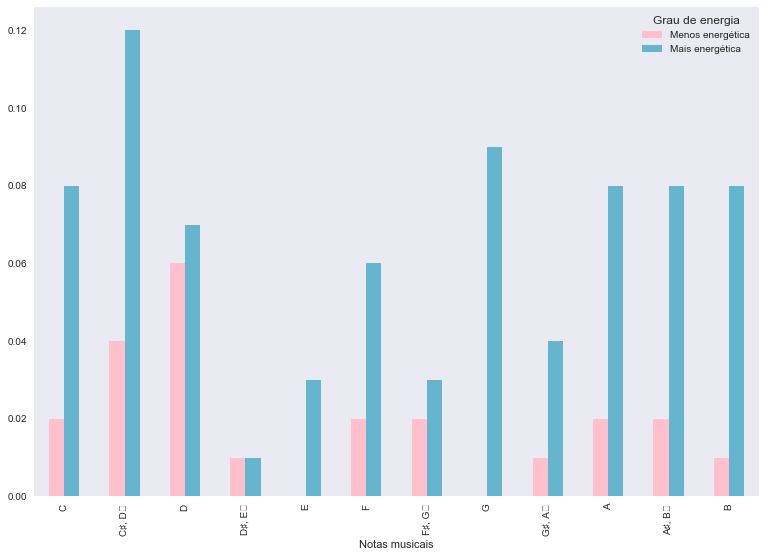

In [43]:
spotdata['notakey'] = spotdata.key
spotdata['notakey'] = spotdata.notakey.astype('category')
spotdata['notakey'].cat.categories = (['C','C♯, D♭','D','D♯, E♭','E','F','F♯, G♭','G','G♯, A♭','A','A♯, B♭','B'])

#filtrando/dividindo os Estados por Regiões:
spotdata.energyy = spotdata.energy
spotdata.energyy[(spotdata.energyy >= 0) & (spotdata.energyy < 0.5)] = [0]
spotdata.energyy[(spotdata.energyy >= 0.5) & (spotdata.energyy < 1)] = [1]
spotdata.energyy = spotdata.energyy.astype('category')
spotdata.energyy.cat.categories = (['Menos energética','Mais energética'])

print('Frequências relativas por notas musicais:')
ut1 = (spotdata.notakey.value_counts(normalize=True)*100).round(decimals=1).reindex(['C','C♯, D♭','D','D♯, E♭','E','F','F♯, G♭','G','G♯, A♭','A','A♯, B♭','B'])
print(ut1,'\n')

#tabela de frequência das notas (key)
NotaEnergy = pd.crosstab(spotdata.notakey,spotdata.energyy, normalize=True, colnames=['Grau de energia'],rownames=['Notas musicais'])
NotaEnergy.plot(kind = 'bar',title = '',figsize=(13,9),color = ('pink','c','purple'),grid=False)

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

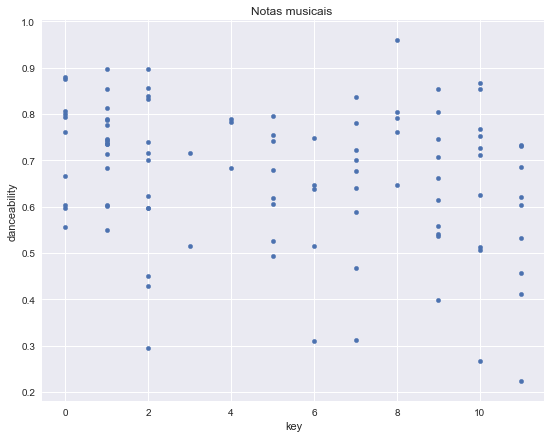

Grau de energia,C,"C♯, D♭",D,"D♯, E♭",E,F,"F♯, G♭",G,"G♯, A♭",A,"A♯, B♭",B,All
Notas musicais,,,,,,,,,,,,,
0.22399999999999998,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01
0.266,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01
0.294,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01
0.309,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01
0.313,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.01
0.39799999999999996,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01
0.41100000000000003,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01
0.429,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01
0.45,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01


In [44]:
#para o treinamento do computador dos 100 primeiros termos
spotdata['mode12key'] = spotdata['mode']*12 + spotdata['key']
spotdata['mode12key'] = np.where(spotdata.mode12key >= spotdata['mode12key'].mean(), 1, 0)

#para o teste dos novos termos de 100 a 200
spotdata['mode12keytreina'] = spotdatatreina['mode']*12 + spotdatatreina['key']
spotdata['mode12keytreina'] = np.where(spotdata.mode12keytreina >= spotdata['mode12keytreina'].mean(), 1, 0)

#plot do gráfico 
spotdata.plot(kind = "scatter", x = "key", y = "danceability",figsize=(9,7))
plt.title('Notas musicais ')
plt.show()

pd.crosstab(spotdata['danceability'],spotdata['notakey'],margins=True,normalize=True, colnames=['Grau de energia'],rownames=['Notas musicais'])

## **Part 2:** Predicting a Categorical Response

In [45]:
# fit a logistic regression model and store the class predictions
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
feature_cols = ['danceability']
X = spotdata[feature_cols]
y = spotdata.mode12key
logreg.fit(X, y)
spotdata['mode12key_pred_class'] = logreg.predict(X)

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
pd.crosstab(spotdata.notakey,spotdata['danceability'], colnames=['Notas musicais'])
spotdata['danceability'].describe()

count    100.00000
mean       0.66918
std        0.15105
min        0.22400
25%        0.59675
50%        0.70300
75%        0.78125
max        0.95900
Name: danceability, dtype: float64

In [7]:
spotdata['mode12key_pred_prob'] = logreg.predict_proba(X)[:, 1]

//anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


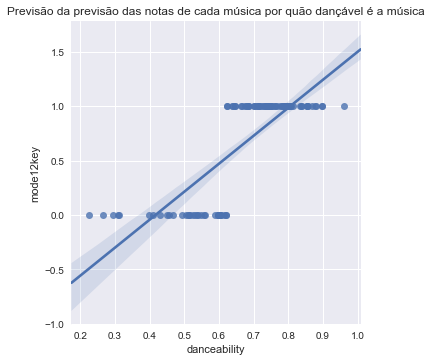

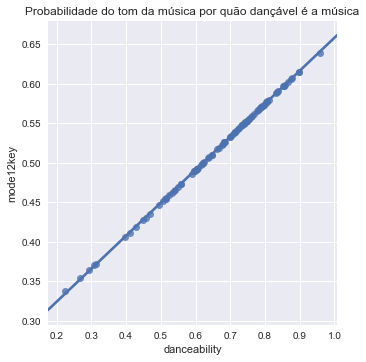

In [8]:
sns.lmplot('danceability','mode12key_pred_class',spotdata)
plt.title('Previsão da previsão das notas de cada música por quão dançável é a música')
plt.xlabel('danceability')
plt.ylabel('mode12key')

sns.lmplot(x = 'danceability', y='mode12key_pred_prob', data=spotdata)
plt.title('Probabilidade do tom da música por quão dançável é a música')
plt.xlabel('danceability')
plt.ylabel('mode12key')

O gráfico de probabilidade nos diz que, para uma dançabilidade menor, a chance de a música ter um tom menor e ter as notas iniciais (mais próximas de dó (key 0 = C)) é maior que a outra chance.

In [9]:
# examine some example predictions

print(logreg.predict_proba(0.2))


[[ 0.67173525  0.32826475]]


# Parte do rascunho que vcs devem ver

peguei desse site: https://seaborn.pydata.org/generated/seaborn.lmplot.html

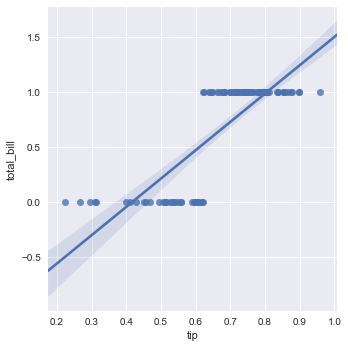

In [30]:
import seaborn as sns; sns.set(color_codes=True)
tips = sns.load_dataset("tips")
tips.total_bill = spotdata.mode12key_pred_class
tips['total_bill_prob'] = spotdata.mode12key_pred_prob
tips.tip = spotdata.danceability
tips.smoker = spotdata.notakey
tips['key'] = spotdata.key
tips['energy'] = spotdata.energy
tips['tom'] = spotdata['mode']


# print(tips)

#grafico dos dois grupos separados pela regressão logística feita
g = sns.lmplot(x='tip', y='total_bill', data=tips)

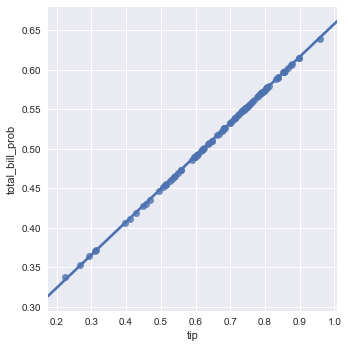

In [31]:
#grafico da probabilidade direto da classe de cima (tom maior)
g = sns.lmplot(x='tip', y='total_bill_prob', data=tips)

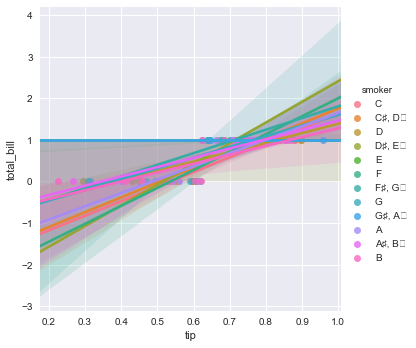

In [32]:

g = sns.lmplot(x="tip", y="total_bill", hue="smoker", data=tips)

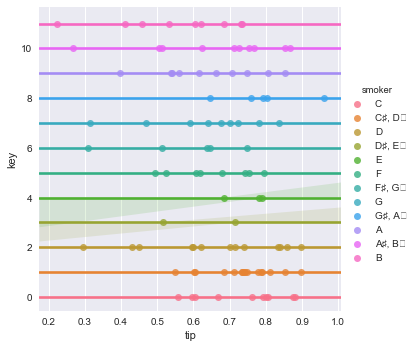

In [33]:
#gráfico de notas por danceability
g = sns.lmplot(x="tip", y="key", hue="smoker", data=tips,markers = ["o","o","o","o","o","o","o","o","o","o","o","o"])

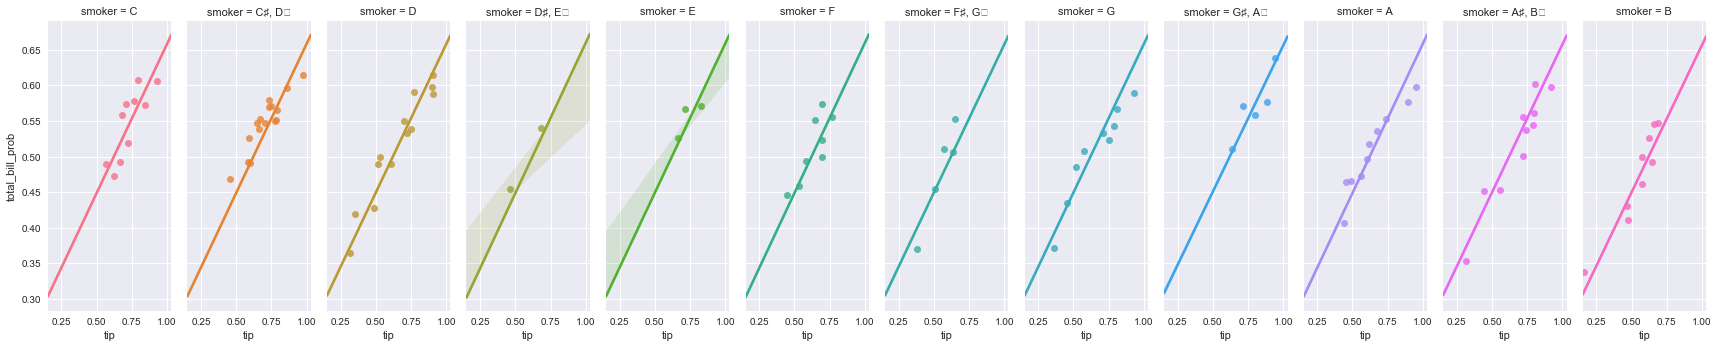

In [37]:
g = sns.lmplot(x='tip', y='total_bill_prob', hue="smoker", col="smoker",data=tips, aspect=.4, x_jitter=.1)
# g = sns.lmplot(x="tip", y="total_bill", hue="smoker", col="smoker",data=tips, aspect=.4, x_jitter=.1)

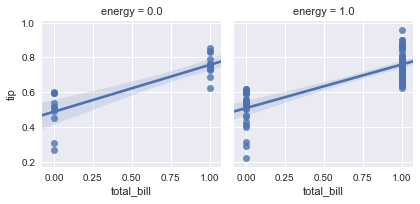

In [35]:
g = sns.lmplot(x="total_bill", y="tip", col="energy", data=tips,size=3)

In [16]:
# g = sns.lmplot(x="tip", y="total_bill",hue="smoker", row="energy", col="total_bill_prob",data=tips, size=3)

In [17]:
g = (g.set_axis_labels("Total bill (US Dollars)", "Tip").set(xlim=(0, 60), ylim=(0, 12),xticks=[10, 30, 50], yticks=[2, 6, 10]).fig.subplots_adjust(wspace=.02))

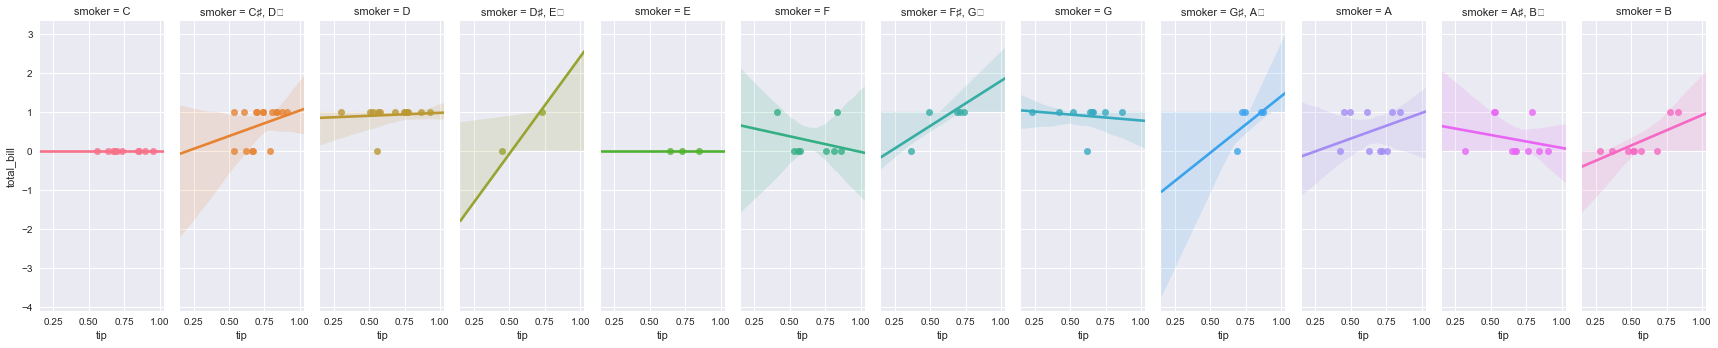

In [18]:
g = sns.lmplot(x="tip", y="total_bill", hue="smoker", col="smoker",data=tips, aspect=.4, x_jitter=.1)

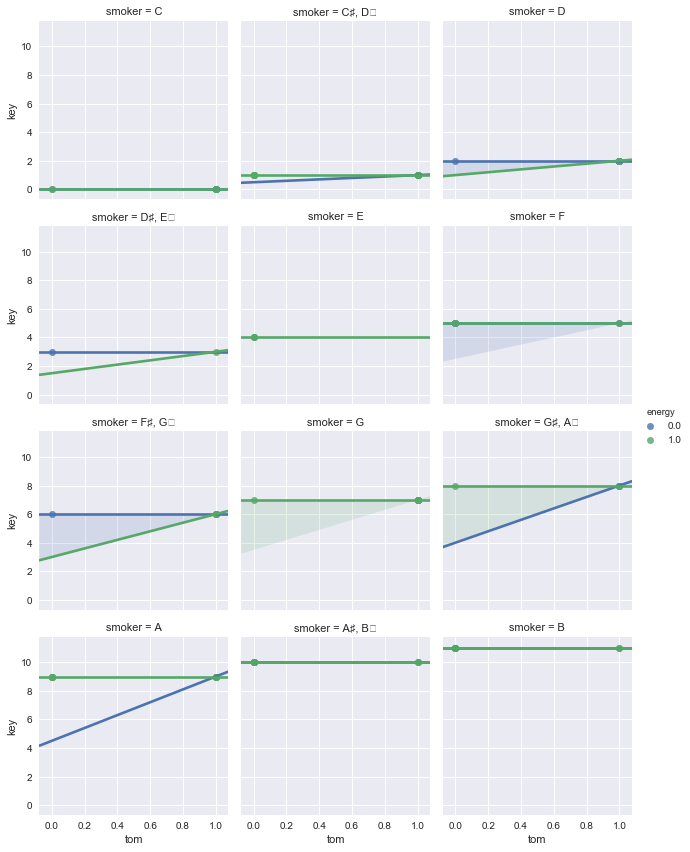

In [25]:
g = sns.lmplot(x="tom", y="key", col="smoker", hue="energy",data=tips, col_wrap=3, size=3)

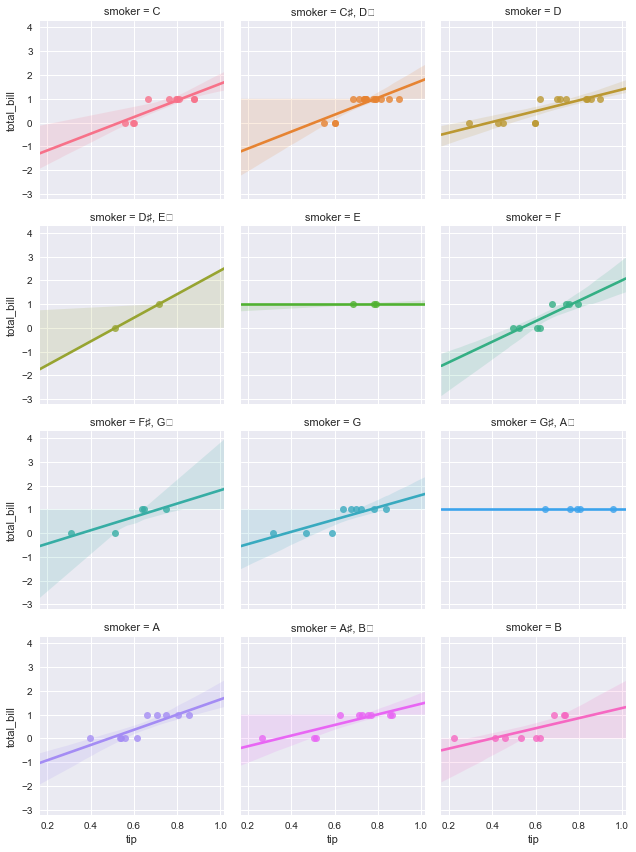

In [27]:
tips['total_bill'] = spotdata['mode12key_pred_class']
g = sns.lmplot(x="tip", y="total_bill", col="smoker", hue="smoker",data=tips, col_wrap=3, size=3)

In [116]:
#o dance que a carla escolheu é de 0.6
#DIREITA
a = [0.6,0.603,0.63,0.6,0.7]
b = ['F','A','B','K','U']
c = []
d = []

notas_ordenadas = []

for i in range(0,5):
    c.append(a[i])
    c.append(b[i])
    d.append(c)
#     print(c)
    c = []
# print(d)
so = []
for i in range(0,len(d)):
    so.append(d[i][0])
so = sorted(so)
# print(so)

for k in range(len(so)):
    for j in range(len(d)):
        if so[k] == d[j][0]:
            notas_ordenadas.append(d[j][1])
            
print('notas em ordem :\n{}'.format((notas_ordenadas)))
print('dances em ordem :\n{}'.format((so)))
print('lista das listinhas (o dance com a nota) :\n{}'.format((d)))




notas em ordem :
['F', 'K', 'F', 'K', 'A', 'B', 'U']
dances em ordem :
[0.6, 0.6, 0.603, 0.63, 0.7]
lista das listinhas (o dance com a nota) :
[[0.6, 'F'], [0.603, 'A'], [0.63, 'B'], [0.6, 'K'], [0.7, 'U']]


In [118]:
a = [0.6,0.603,0.63,0.6,0.7]
b = ['F','A','B','K','U']

Z = [x for _,x in sorted(zip(a,b))]
print(Z)

['F', 'K', 'A', 'B', 'U']


In [ ]:
#o dance que a carla escolheu é de 0.6
#ESQUERDA
a = [0.5,0.503,0.4,0.5,0.59]
b = ['G','Q','W','E','U']
c = []
d = []

notas_ordenadas = []

for i in range(0,5):
    c.append(a[i])
    c.append(b[i])
    d.append(c)
#     print(c)
    c = []
# print(d)
so = []
for i in range(0,len(d)):
    so.append(d[i][0])
so = sorted(so)
# print(so)

for k in range(len(so)):
    for j in range(len(d)):
        if so[k] == d[j][0]:
            notas_ordenadas.append(d[j][1])
            
print('notas em ordem :\n{}'.format((notas_ordenadas)))
print('dances em ordem :\n{}'.format((so)))
print('lista das listinhas (o dance com a nota) :\n{}'.format((d)))



In [ ]:
dummy_ranks = pd.get_dummies(spotdata['energy'], prefix='energy')
print (dummy_ranks.head())
#trasnformar energy em binarios, ou seja, eh energetico ou nao

In [ ]:
cols_to_keep = ['mode','danceability', 'mode12key']
dataff = spotdata[cols_to_keep].join(dummy_ranks.ix[:, 'energy_0':])
print (dataff.head())
#ordenando as informaoes, com o MODE, tom, como a variavel que queremos descobrir

In [ ]:
dataff['intercept'] = 1.0

In [ ]:
#data = data[pd.notnull(data['Cost'])],

#data = data[pd.notnull(data['R(t)'])],

In [ ]:
import statsmodels.api as sm
train_cols = dataff.columns[1:]
logit = sm.Logit(dataff['mode'], dataff[train_cols])
result = logit.fit()

In [ ]:
print (result.summary())

In [ ]:
print (result.conf_int())